#### Name - Pushkar Ashok Narkehde
#### Roll - 2203528 | MITU20BTCSD018
#### Class - TY CSE IS3 batch B

#### Assignment 5
##### Aim - 
-   Implement SVM Classifier or Regression for given dataset

##### Objective -
1. To learn SVM and kernel functions
2. To implement SVM classifier

##### Theory - 

##### Support Vector MAchine basic Intution - 
    1. SVM i.e support vector machine is supervised machine learning algorithm that usually used for classification as well as regression.
    2. for classification purpose SVM make use of support vectors to draw a line which classify the data in two parts.
    3. usually SVM is used for binary classification but we can use it for multinomial also by changing the algorith strategy from ovo i.e one versus ones to ovr i.e one versus rest.
    4. SVM draws hyperplane which classify the data point. if the data is not classified in 2d plane then SVM transform the data into 3D plane this is also knows as kernel trick.
    5. SVM is considerd as well optimized algorithm which consume less memory as it only focus on support vectors i.e the datapoints near to or on hyperplan, because they are only data points that get's misclassifed easily.

##### Support Vector Classifier working - 
    1. SVC algorithm first finds the best hyperplane wtih maximum marging with the helps of support vectors.
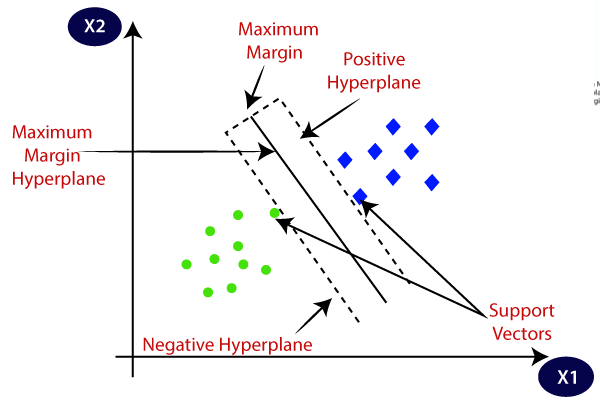

    2. In the above figure we can see the green points which belongs to one class and blue point which belongs to another second class.
    3. The data point that are near to dotted line are called as suport vectors and the gap between two support vector is called as margin.
    4. The primary purpose of SVC is to maximize the marging between support vector and draws the hyperplane i.e line (y=mx+c) in case of 2D plane.
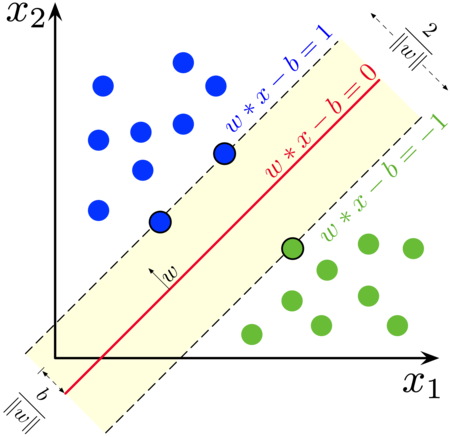

    5. In the above figure you can observe the hyperplane equation i.e ( w * x - b = 0 ) where W is weight vector and x is input matrix and b is nothing but Bias i.e we can say that intercept which allows a line to draw in every angle and every direction.
    6. The distance between these two hyperplane is calculated by ( 2 / || W || ) that SVC tries to maximize.
    7. the datapoint which are greater than ( w * x - b = 0 ) are classified as one class and and datapoint whic are less than ( w * x - b ) are classified as another class.
    8. To maximize the distance between these plane we need to minimize || W ||, hence SVC is nothing but minimiation problem, and to minimize || W || we multiple || w || by 0.5 or 1/2 * || W ||.
    
##### Metrices - 
##### Confusion matrix - 
    1. This matrix shows that how much data is classified as positive and negative as well as it also indicates that how that positive and negatve classification done w.r.t positive and negative classe, i.e. True positive, False Positive, True Negative, False Negative
    2. True Positive - It is noting but how much positive we are predeicted that are acutually positive. i.e actaul also +ve and predited also +ve
    3. False Positive - It shows that how much positive we are predicted that are actually false i.e. actaul is -ve but predicted as +ve
    4. True Negative - It sows that how much negative we are predicted that are actaully negaive i.e actual is -ve and predicted is also -ve.
    5. False Negative - It shows that how much negative we are predicted that are actaually positive i.e actual is +ve but predicted as -ve.
    6. By using confusion matrix we can comes up with precision, recall, accuracy, f1-score etc.
    
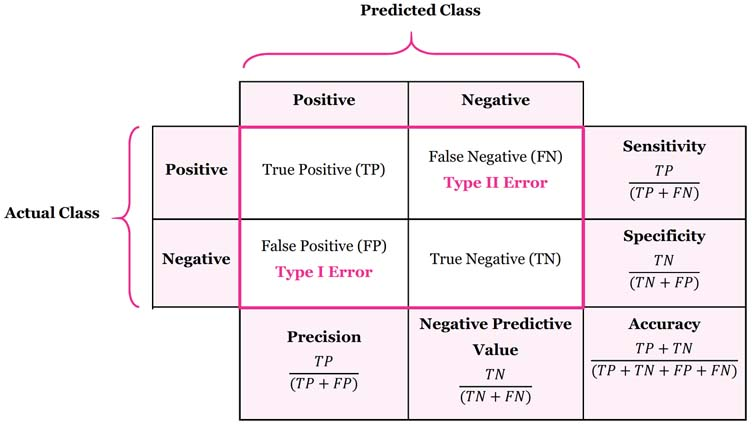
    
##### Accuracy - 
    1. It is nothing but how much correct we are predicte from the total data i.e TP+TN / TP+TN+FP+FN
    2. it is a measuer which shows that how much confident our algorihtm on the data in prediction 
 
##### Precision -
    1. Precison is nothing but a positive predicted rate i.e TP / TP+FP
    2. for example assume that we have True positive as 4 and TP+FP as 4+1 then our Precision is 4/4+1 i.e. 4/5
    3. in any casey your TPR should be as possible as more.
    
##### Recall -
    1. Recall score is measure of TP / TP+FN i.e ratio of TP and TP+FN which should be high as possible as it can.
    2. Recall is also called as sebsitivity which is calculated on total datapoints.

##### F1-score -
    1. F1-Score is measure in case of data imabalnce and it is best fit between Precision and Recall.
    2. F1-Score is 2*precision + recall / Precision * recall.
    3. F1 score shouuld be as possible as high as it is combination of precision and recall

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix,roc_auc_score,classification_report,precision_score,recall_score,roc_curve,auc,accuracy_score,f1_score

In [2]:
df = pd.read_csv('Placement_Data_Full_Class.csv')
df.shape

(215, 15)

In [4]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [5]:
df.status.value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

- Here we are dealing with classififcation probelm i.e if a student is placed or not into a compay.
- we does not need clumn serial no i.e sl_no as it is not for our use.
- also we have to ecode the data and then we need to scale it.

In [3]:
df.isna().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

- as we are dealing with placement hence if a student is not placed it means that there is no salary.
- also not placed count is 67 and null count is also 67 hence our assumption is right.
- let's make nan into 0.

In [6]:
df.salary.replace(to_replace=np.nan,value=0,inplace=True)

In [7]:
df.isna().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [10]:
df.drop('sl_no',axis=1,inplace=True)

In [11]:
df.shape

(215, 14)

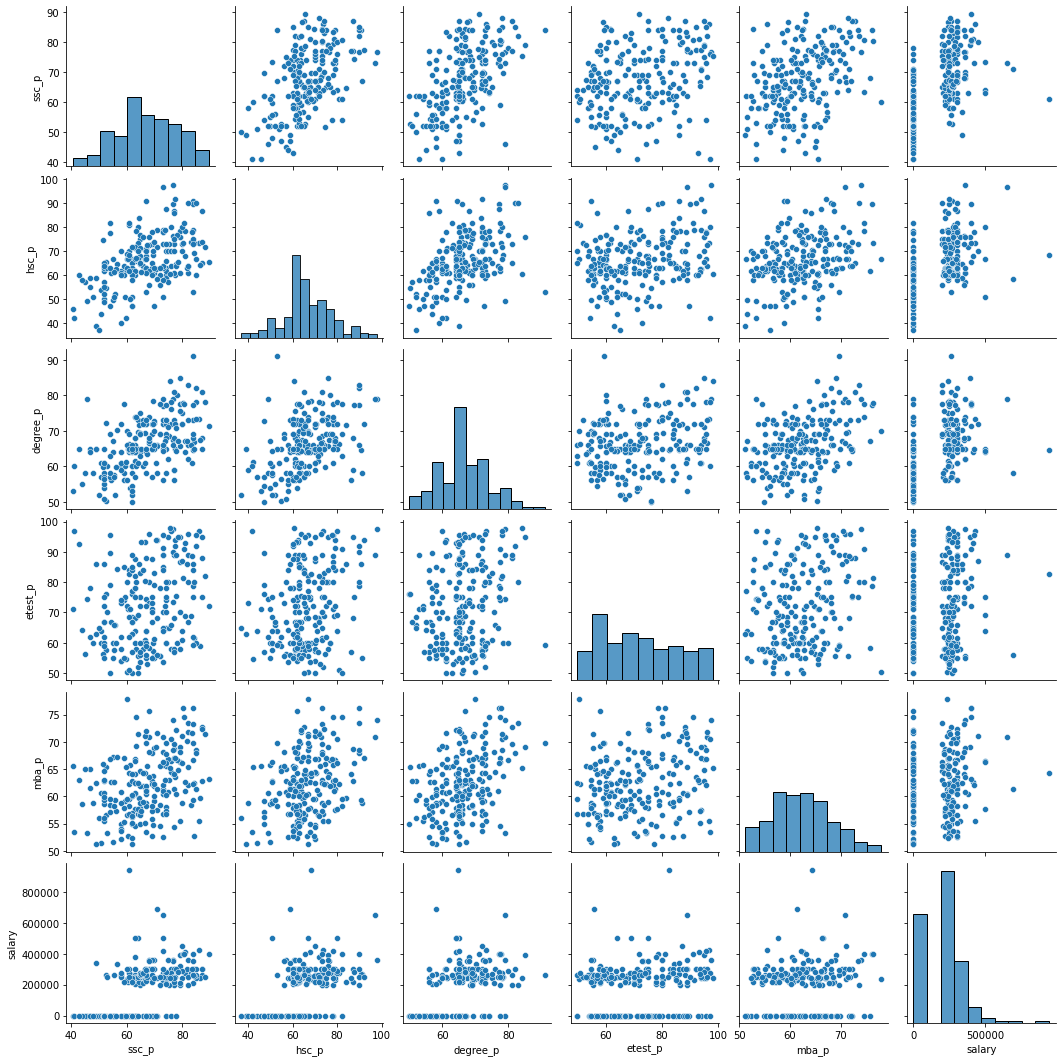

In [12]:
sns.pairplot(df)

- The data is not linear and it is not seperable by a single line.
- let's first analyze the data.

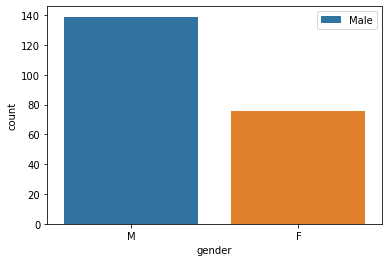

In [14]:
sns.countplot(df.gender)

- We have gender ratio like 1: 1/2, on every 100 male we have around 50 female.

<AxesSubplot:xlabel='ssc_b', ylabel='count'>

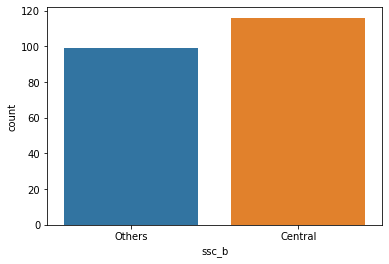

In [15]:
sns.countplot(df.ssc_b)

- In our dataset, the student passed ssc from central board are more but not.

<AxesSubplot:xlabel='ssc_b', ylabel='ssc_p'>

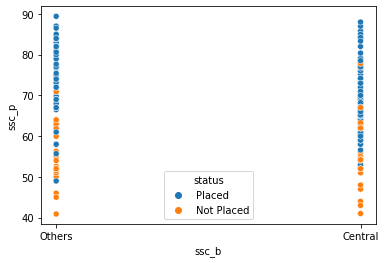

In [17]:
sns.scatterplot(x= df.ssc_b,y=df.ssc_p,hue=df.status)

- by observing the scatter plot we get that the student having less than 60% are not placed.
- hence we infere that student need more ssc marks to placed i.e >60% 

<AxesSubplot:xlabel='hsc_b', ylabel='hsc_p'>

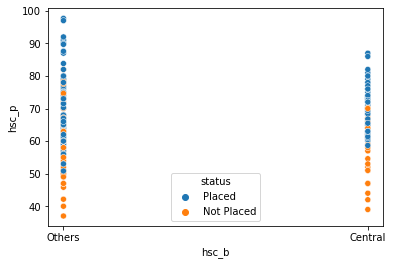

In [18]:
sns.scatterplot(x= df.hsc_b,y=df.hsc_p,hue=df.status)

- for HSC board the criteria of marks fall down to around 55% fro central and around 50% for other boards.

<AxesSubplot:xlabel='hsc_p', ylabel='hsc_s'>

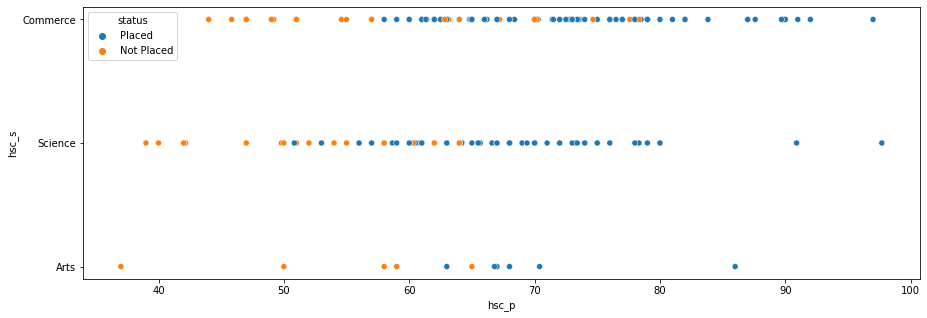

In [21]:
plt.figure(figsize=(15,5))
sns.scatterplot(y= df.hsc_s,x=df.hsc_p,hue=df.status)

- commerce student having marks less than 58% are not placed.
- Science student having marks less than 50% strictly not places but students having marks >65 are all placed
- for Art student there are few placement only 

<AxesSubplot:xlabel='hsc_s', ylabel='salary'>

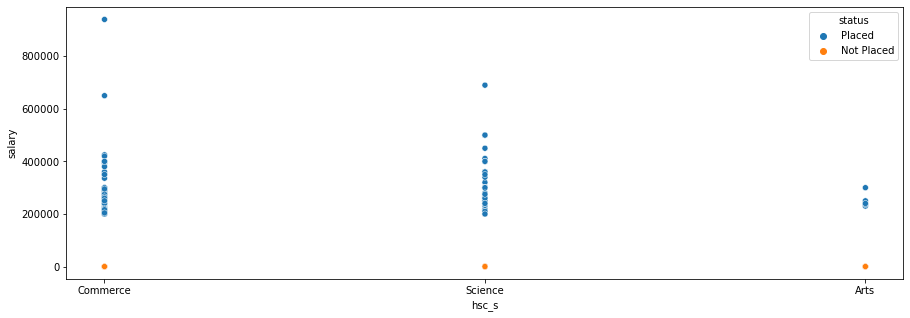

In [22]:
plt.figure(figsize=(15,5))
sns.scatterplot(y= df.salary,x=df.hsc_s,hue=df.status)

- on an average student got starting salary on 2 lakh per year.
- as we got any infernce let's drop the column salary because it's value are after placement hence it will not helps use for prediction.

In [27]:
df.drop('salary',axis=1,inplace=True)

- Let's encode the data for further processing.

In [28]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [29]:
df["gender"] = df["gender"].astype('category')
df["ssc_b"] = df["ssc_b"].astype('category')
df["hsc_b"] = df["hsc_b"].astype('category')
df["degree_t"] = df["degree_t"].astype('category')
df["workex"] = df["workex"].astype('category')
df["specialisation"] = df["specialisation"].astype('category')
df["status"] = df["status"].astype('category')
df["hsc_s"] = df["hsc_s"].astype('category')
df.dtypes

gender            category
ssc_p              float64
ssc_b             category
hsc_p              float64
hsc_b             category
hsc_s             category
degree_p           float64
degree_t          category
workex            category
etest_p            float64
specialisation    category
mba_p              float64
status            category
dtype: object

- here we are converting the data type to category so that we can directly got the categorical value for that column.

In [30]:
df["gender"] = df["gender"].cat.codes
df["ssc_b"] = df["ssc_b"].cat.codes
df["hsc_b"] = df["hsc_b"].cat.codes
df["degree_t"] = df["degree_t"].cat.codes
df["workex"] = df["workex"].cat.codes
df["specialisation"] = df["specialisation"].cat.codes
df["status"] = df["status"].cat.codes
df["hsc_s"] = df["hsc_s"].cat.codes
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1


- yup, we got the categorical values and now we are ready to precess further.

#### model Building

In [32]:
X = df.drop('status', axis=1 )
y = df['status']
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=42) 
X_train.shape , X_test.shape, y_train.shape, y_test.shape

((172, 12), (43, 12), (172,), (43,))

In [33]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import cohen_kappa_score, roc_auc_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import log_loss

def classification_metric(y_test,y_pred,y_prob,label,n=1,verbose=False):
    
    # confusion matrix
    cm = confusion_matrix(y_test,y_pred)
    row_sum = cm.sum(axis=0)
    cm = np.append(cm,row_sum.reshape(1,-1),axis=0)
    col_sum = cm.sum(axis=1)
    cm = np.append(cm,col_sum.reshape(-1,1),axis=1)

    labels = label+['Total']
    plt.figure(figsize=(10,6))
    sns.heatmap(cm,annot=True,cmap='summer',fmt='0.2f',xticklabels=labels,
                yticklabels=labels,linewidths=3,cbar=None,)

    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title('Confusion Matrix')
    plt.show()
    
    print('*'*30+'Classifcation Report'+'*'*30+'\n\n')
    cr = classification_report(y_test,y_pred)
    print(cr)
    
    print('\n'+'*'*36+'Kappa Score'+'*'*36+'\n\n')
    # Kappa score
    kappa = cohen_kappa_score(y_test,y_pred) # Kappa Score
    print('Kappa Score =',kappa)
    
    print('\n'+'*'*30+'Area Under Curve Score'+'*'*30+'\n\n')
    # Kappa score
    roc_a = roc_auc_score(y_test,y_pred) # Kappa Score
    print('AUC Score =',roc_a)
    
    # ROC
    plt.figure(figsize=(8,5))
    fpr,tpr, thresh = roc_curve(y_test,y_prob)
    plt.plot(fpr,tpr,'r')
    print('Number of probabilities to build ROC =',len(fpr))
    if verbose == True:
        for i in range(len(thresh)):
            if i%n == 0:
                plt.text(fpr[i],tpr[i],'%0.2f'%thresh[i])
                plt.plot(fpr[i],tpr[i],'v')


    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characterstic')
    plt.legend(['AUC = {}'.format(roc_a)])
    plt.plot([0,1],[0,1],'b--',linewidth=2.0)
    plt.grid()
    plt.show()
  







  
    
class threshold():
    
    def __init__(self):
        self.th = 0.5
        
    def predict_threshold(self,y):
        if y >= self.th:
            return 1
        else:
            return 0

In [36]:
svc = SVC(probability=True)
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)
y_pred_prob_svc = svc.predict_proba(X_test)[:,1]
print('Support Vector Machine with default parameter ')
print('Trainig Score: ', svc.score(X_train,y_train))
print('Testing Accuracy Score: ', metrics.accuracy_score(y_test,y_pred_svc))

Support Vector Machine with default parameter 
Trainig Score:  0.8604651162790697
Testing Accuracy Score:  0.7674418604651163


- our SVC with default paramter is overfitted to unstandardize data, hence it is not useful to us.
- let's tune with some parameter with different kernel.

In [37]:
# model1 SVM linear 
kernel = ['linear','rbf','poly','sigmoid']
for kernel in kernel:
    svc=SVC(kernel=kernel)
    svc.fit(X_train,y_train)
    y_pred=svc.predict(X_test)
    print(kernel)
    print('Trainig Score: ', svc.score(X_train,y_train))
    print('Testing Accuracy Score: ', metrics.accuracy_score(y_test,y_pred))
    print('*'*35)

linear
Trainig Score:  0.8953488372093024
Testing Accuracy Score:  0.8837209302325582
***********************************
rbf
Trainig Score:  0.8604651162790697
Testing Accuracy Score:  0.7674418604651163
***********************************
poly
Trainig Score:  0.872093023255814
Testing Accuracy Score:  0.7441860465116279
***********************************
sigmoid
Trainig Score:  0.6802325581395349
Testing Accuracy Score:  0.7209302325581395
***********************************


- by observation we say that SVC with linear kernal will gives better accuray than other kernal and it does not overfit.
- Overfitting is cause because we have less amount of data.
- let's use K -fold cross validation and see the difference.

In [48]:
kfold = KFold(n_splits=10,shuffle=True)

In [49]:
model = SVC(kernel='linear',probability=True);
cv_result = cross_val_score(model,X,y,cv=kfold,scoring='accuracy')
cv_result = cv_result
print(cv_result.mean())

0.865151515151515


- as we have small amount of data hence we have to use less fold because using more fold is repeating the data.
- by using folding we haven't acieve more accuracy hence we stick to our solution that using svc with linear kernal only.

In [50]:
svc = SVC(kernel='linear',probability=True)
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)
y_pred_prob_svc = svc.predict_proba(X_test)[:,1]
print('Support Vector Machine with Linear Kernel ')
print('Trainig Score: ', svc.score(X_train,y_train))
print('Testing Accuracy Score: ', metrics.accuracy_score(y_test,y_pred_svc))

Support Vector Machine with Linear Kernel 
Trainig Score:  0.8953488372093024
Testing Accuracy Score:  0.8837209302325582


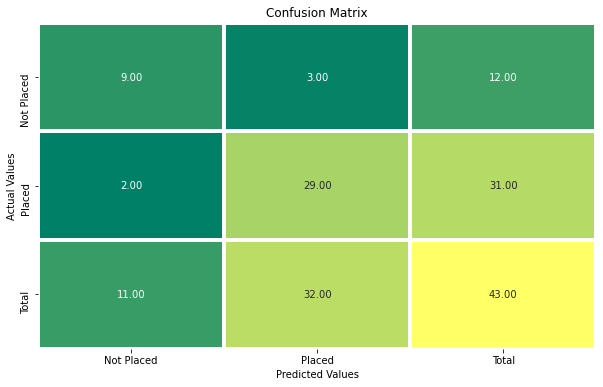

******************************Classifcation Report******************************


              precision    recall  f1-score   support

           0       0.82      0.75      0.78        12
           1       0.91      0.94      0.92        31

    accuracy                           0.88        43
   macro avg       0.86      0.84      0.85        43
weighted avg       0.88      0.88      0.88        43


************************************Kappa Score************************************


Kappa Score = 0.703448275862069

******************************Area Under Curve Score******************************


AUC Score = 0.842741935483871
Number of probabilities to build ROC = 12


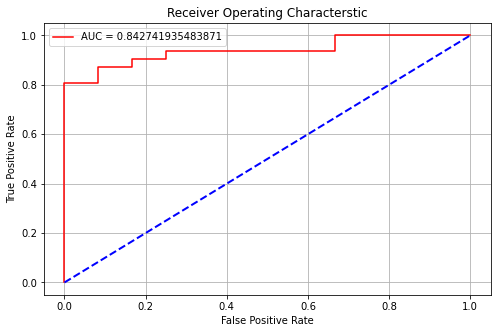

In [51]:
classification_metric(y_test,y_pred_svc,y_pred_prob_svc,label=['Not Placed','Placed'])

- We got good accuracy with svc hence our final model is svc with linear kernel

### Conclusion - 
- we got good accuracy with 89% on which our model is best fitted with small amount of data only.
- we got good AUC area hence we does not need to worry about.

### Issue - 
- as we have less amount of data we aren't say about unseen data and it's miscalssification. the reason is the model learn too small from small data.